In [1]:
# Import necessary packages
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [2]:
# Initialize instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.7.0_80"; Java(TM) SE Runtime Environment (build 1.7.0_80-b15); Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from /Users/megankurka/anaconda2/lib/python2.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gv/w2f3zs_d33l3dt5j67k9nhhr0000gn/T/tmpL62UR8
  JVM stdout: /var/folders/gv/w2f3zs_d33l3dt5j67k9nhhr0000gn/T/tmpL62UR8/h2o_megankurka_started_from_python.out
  JVM stderr: /var/folders/gv/w2f3zs_d33l3dt5j67k9nhhr0000gn/T/tmpL62UR8/h2o_megankurka_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.4.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_megankurka_pszcwz
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [3]:
# If possible download from the s3 link and change the path to the dataset
path = "http://h2o-public-test-data.s3.amazonaws.com/bigdata/laptop/lending-club/LoanStats3a.csv"

In [4]:
# Specify some column types to "String" that we want to munge later
types = {"int_rate":"string", "revol_util":"string", "emp_length":"string", "verification_status": "string"}

In [5]:
# Task 1: Import the file and look at the frame
loanStats = h2o.import_file(path=path, col_types= types)
loanStats.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:42538
Cols:52




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
type,int,int,int,int,real,enum,string,real,enum,enum,enum,string,enum,real,string,time,enum,enum,string,enum,enum,enum,enum,enum,real,int,time,int,enum,enum,int,int,int,string,int,enum,real,real,real,real,real,real,real,real,real,time,real,time,time,int,enum,int
mins,54734.0,70473.0,500.0,500.0,0.0,,NaN,15.67,,,,NaN,,1896.0,NaN,1.180656e+12,,,NaN,,,,,,0.0,0.0,-7.573824e+11,0.0,,,1.0,0.0,0.0,NaN,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1964672e+12,0.0,1.1964672e+12,1.1779776e+12,0.0,,1.0
mean,664579.85231,825702.55117,11089.7225814,10821.5857529,10139.8306012,,NaN,322.625618667,,,,NaN,,69136.5564203,NaN,1.28564160993e+12,,,NaN,,,,,,13.3730431409,0.152449066014,8.54295612817e+11,1.08142379899,,,9.34395144215,0.0581564955536,14297.8609145,NaN,22.1244059662,,329.411123545,327.08996544,11651.753137,10948.5801657,9368.08058187,2209.04911203,1.45873268638,73.164719007,9.07681827201,1.36032037132e+12,2552.60725685,1.38132344523e+12,1.38597191711e+12,0.0,,1.0
maxs,1077501.0,1314167.0,35000.0,35000.0,35000.0,,NaN,1305.19,,,,NaN,,6000000.0,NaN,1.3226976e+12,,,NaN,,,,,,29.99,13.0,1.2254976e+12,33.0,,,47.0,5.0,1207359.0,NaN,90.0,,17749.51,17749.51,56809.0516288,56475.05,35000.03,21809.05,208.819529958,29623.35,7002.19,1.4331168e+12,36115.2,1.4383872e+12,1.4357088e+12,0.0,,1.0
sigma,219302.219319,279540.905635,7410.93839055,7146.91467501,7131.68644868,,NaN,208.928069,,,,NaN,,64096.3497189,NaN,31759283733.1,,,NaN,,,,,,6.72631490173,0.512406485017,2.16068688522e+11,1.5274548353,,,4.49627387569,0.245713140651,22018.4410097,NaN,11.5928113373,,1417.54568613,1409.61373349,8555.46989933,8486.98039403,6777.11981861,2502.52824092,7.57275617593,612.26018535,149.086823026,47801906399.7,4380.38476617,69074077358.6,49253773579.3,0.0,,0.0
zeros,0,0,0,0,233,,0,0,,,,0,,0,0,0,,,0,,,,,,206,37771,4,19657,,,0,40130,1119,0,0,,38972,38972,26,304,86,83,40214,38357,39033,0,95,0,0,42390,,0
missing,3,3,3,3,3,3,3,3,3,3,3,3,3,7,3,3,3,3,3,3,3,3,3,3,3,32,32,32,3,3,32,32,3,3,32,3,3,3,3,3,3,3,3,3,3,86,3,36281,7,148,3,3
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000.0,VERIFIED - income,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01 00:00:00,1.0,,,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5861.07141425,5831.78,5000.0,861.07,0.0,0.0,0.0,2015-01-01 00:00:00,171.62,,2015-01-01 00:00:00,0.0,,1.0
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,VERIFIED - income source,2011-12-01 00:00:00,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces,car,bike,309xx,GA,1.0,0.0,199

In [6]:
# Task 2: Look at the levels int he response column, "loan_status"
# Hint: Use .table() function on the response column



loan_status,Count
Charged Off,5435
Current,3351
Default,7
Does not meet the credit policy. Status:Charged Off,761
Does not meet the credit policy. Status:Current,53
Does not meet the credit policy. Status:Fully Paid,1933
Does not meet the credit policy. Status:In Grace Period,2
Fully Paid,30843
In Grace Period,60
Late (16-30 days),16


In [7]:
# Task 3: Drop all loans that are still in progess and therefore cannot be deemed good/bad loans
# Hint: "Current", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)" are ongoing loans


In [8]:
loanStats.show()

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
1.0775e+06,1.2966e+06,5000,5000,4975,36 months,10.65%,162.87,B,B2,,10+ years,RENT,24000,VERIFIED - income,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01 00:00:00,1,,,3,0,13648,83.7%,9,f,0,0,5861.07,5831.78,5000,861.07,0,0,0,2015-01-01 00:00:00,171.62,,2015-01-01 00:00:00,0,,1
1.07743e+06,1.31417e+06,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,VERIFIED - income source,2011-12-01 00:00:00,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces,car,bike,309xx,GA,1,0,1999-04-01 00:00:00,5,,,3,0,1687,9.4%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,2013-04-01 00:00:00,119.66,,2013-09-01 00:00:00,0,,1
1.07718e+06,1.31352e+06,2400,2400,2400,36 months,15.96%,84.33,C,C5,,10+ years,RENT,12252,not verified,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,,small_business,real estate business,606xx,IL,8.72,0,2001-11-01 00:00:00,2,,,2,0,2956,98.5%,10,f,0,0,3003.65,3003.65,2400,603.65,0,0,0,2014-06-01 00:00:00,649.91,,2015-06-01 00:00:00,0,,1
1.07686e+06,1.27718e+06,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.",other,personel,917xx,CA,20,0,1996-02-01 00:00:00,1,35,,10,0,5598,21%,37,f,0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,2015-01-01 00:00:00,357.48,,2015-01-01 00:00:00,0,,1
1.07527e+06,1.31144e+06,5000,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269,,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,2004-11-01 00:00:00,3,,,9,0,7963,28.3%,12,f,0,0,5631.38,5631.38,5000,631.38,0,0,0,2015-01-01 00:00:00,161.03,,2015-06-01 00:00:00,0,,1
1.07205e+06,1.28869e+06,3000,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000,VERIFIED - income source,2011-12-01 00:00:00,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053,Borrower added on 12/16/11 > Downpayment for a car.,car,Car Downpayment,900xx,CA,5.35,0,2007-01-01 00:00:00,2,,,4,0,8221,87.5%,4,f,0,0,3938.14,3938.14,3000,938.14,0,0,0,2015-01-01 00:00:00,111.34,,2014-12-01 00:00:00,0,,1
1.0718e+06,1.30696e+06,5600,5600,5600,60 months,21.28%,152.39,

In [9]:
# Task 4: Bin the response variable to good/bad oans only, use your best judgement for what qualifies as a good/bad loan
# Create a new column called "bad_loan" which should be a binary variable
# Hint: You can turn the bad_loan columm into a factor using .asfactor()


In [10]:
# Task 5: String munging to clearn string columns before converting to numeric
# Hint: Column that need munging include "int_rate," "revol_util," "emp_length"

#### Example for int_rate using gsub, trim, asnumeric ####
loanStats["int_rate"] = loanStats["int_rate"].gsub(pattern = "%", replacement = "") # strip %
loanStats["int_rate"] = loanStats["int_rate"].trim() # trim ws
loanStats["int_rate"] = loanStats["int_rate"].asnumeric() #change to a numeric 
loanStats["int_rate"].show()

int_rate
10.65
15.27
15.96
13.49
7.9
18.64
21.28
12.69
14.65
12.69


In [11]:
# Now try for revol_util yourself


revol_util
83.7
9.4
98.5
21
28.3
87.5
32.6
36.5
20.6
67.1


In [12]:
# Now we're going to clean up emp_length
# Use gsub to remove " year" and " years" also translate n/a to "" 
loanStats["emp_length"] = loanStats["emp_length"].gsub(pattern = "([ ]*+[a-zA-Z].*)|(n/a)", 
                                              replacement = "") 

# Use trim to remove any trailing spaces 
loanStats["emp_length"] = loanStats["emp_length"].trim()

In [13]:
# Use sub to convert < 1 to 0 years and do the same for 10 + to 10
# Hint: Be mindful of spaces between characters


emp_length
10
0
10
10
3
9
4
0
5
10


In [14]:
# Task 6: Create new feature called credit_length_in_years
# Hint: Do this by subtracting the year of the earliest_cr_line and the year of issue_d


credit_length_in_years
26
12
10
15
7
4
7
7
13
22


In [15]:
# Task 7: Use the sub function to create two levels from the verification_status column. 
# Ie "verified" and "not verified"


In [16]:
# Task 8: Define your response and predictor variables 
myY = "bad_loan"
myX = []

In [17]:
# Task 9: Do a test-train split (80-20)
# Hint: use h2o's split_frame function


In [18]:
# Task 10: Build model predicting good/bad loan 
# Note: Use any of the classification methods available including GLM, GBM, Random Forest, and Deep Learning

# Training GLM Model
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(model_id="GLM_BadLoan",
                                          family = "binomial")

glm_model.train(x = myX, y = myY, training_frame = train, validation_frame = test)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [19]:
# Training GBM Model



gbm Model Build progress: |███████████████████████████████████████████████| 100%


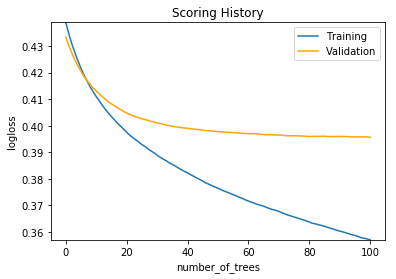

In [20]:
# Task 11: Plot the scoring history to make sure you're not overfitting
# Hint: Use plot function on the model object


In [21]:
# Task 12: Check the variable importance and generate confusion matrix for max F1 threshold
# Hint: Use varimp for non-GLM model and use confusion_matrix



                  variable  relative_importance  scaled_importance  percentage
0               addr_state          2050.934326           1.000000    0.264285
1                     term          1789.721069           0.872637    0.230625
2                  purpose           896.928833           0.437327    0.115579
3           inq_last_6mths           665.482117           0.324478    0.085755
4               revol_util           648.425781           0.316161    0.083557
5               annual_inc           544.144592           0.265315    0.070119
6                loan_amnt           217.586838           0.106092    0.028038
7                 open_acc           126.780907           0.061816    0.016337
8                      dti           124.781395           0.060841    0.016079
9               emp_length           119.256645           0.058147    0.015368
10  credit_length_in_years           117.319832           0.057203    0.015118
11               revol_bal           107.744072     

,0,1,Error,Rate
0,4916.0,1640.0,0.2502,(1640.0/6556.0)
1,537.0,677.0,0.4423,(537.0/1214.0)
Total,5453.0,2317.0,0.2802,(2177.0/7770.0)


In [22]:
# Task 13: Score the entire data set using the model
# Hint: Use predict.



gbm prediction progress: |████████████████████████████████████████████████| 100%


In [23]:
# Extra: Calculate the money gain/loss if model is implemented
# Calculate the total amount of money earned or lost per loan

loanStats["earned"] = loanStats["total_pymnt"] - loanStats["loan_amnt"]

In [24]:
# Calculate how much money will be lost to false negative, vs how much will be saved due to true positives
loanStats["pred"] = pred["predict"]

grouped = loanStats.group_by(["bad_loan","pred"])
net = grouped.sum(col = "earned", na = "ignore").get_frame()

n1 = net[(net["bad_loan"] == "0") & (net["pred"] == "0")]["sum_earned"].round(digits = 0).max()
n2 = net[(net["bad_loan"] == "0") & (net["pred"] == "1")]["sum_earned"].round(digits = 0).max()
n3 = (-1)*net[(net["bad_loan"] == "1") & (net["pred"] == "1")]["sum_earned"].round(digits = 0).max()
n4 = (-1)*net[(net["bad_loan"] == "1") & (net["pred"] == "0")]["sum_earned"].round(digits = 0).max()

# Calculate the amount of earned
print "Total amount of profit still earned using the model : %s" %'${:0,.0f}'.format(n1)
print "Total amount of profit forfeitted using the model : %s" %'${:0,.0f}'.format(n2)
print "Total amount of loss that could have been prevented : %s" %'${:0,.0f}'.format(n3)
print "Total amount of loss that still would've accrued : %s" %'${:0,.0f}'.format(n4)

Total amount of profit still earned using the model : $35,715,481
Total amount of profit forfeitted using the model : $17,862,985
Total amount of loss that could have been prevented : $25,295,130
Total amount of loss that still would've accrued : $9,419,740
